In [1]:
# HIDDEN
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

## Lecture 13: Confidence Intervals ##

In [2]:
births = Table.read_table('baby.csv')

In [3]:
births

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False
138,244,33,62,178,False
132,245,23,65,140,False
120,289,25,62,125,False
143,299,30,66,136,True
140,351,27,68,120,False


In [4]:
babies = births.select('Birth Weight', 'Gestational Days')

In [5]:
babies = babies.with_column(
    'Ratio BW/GD', babies.column(0) / babies.column(1)
)

In [6]:
babies

Birth Weight,Gestational Days,Ratio BW/GD
120,284,0.422535
113,282,0.400709
128,279,0.458781
108,282,0.382979
136,286,0.475524
138,244,0.565574
132,245,0.538776
120,289,0.415225
143,299,0.478261
140,351,0.39886


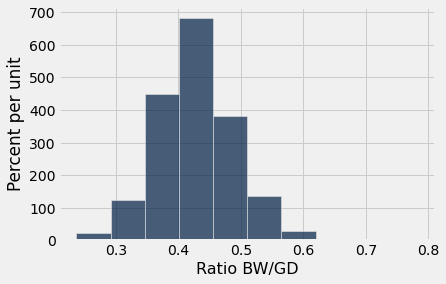

In [7]:
babies.hist('Ratio BW/GD')

In [8]:
percentile(50, babies.column('Ratio BW/GD'))

0.42907801418439717

In [ ]:
# Bootstrap the sample median

medians = make_array()

for i in np.arange(5000):
    resample = babies.sample()
    resampled_median = percentile(50, resample.column('Ratio BW/GD'))
    medians = np.append(medians, resampled_median)

In [ ]:
interval_95 = make_array(percentile(2.5, medians), percentile(97.5, medians))
interval_95

In [ ]:
Table().with_column('Resampled Median', medians).hist()
plots.plot(interval_95, [0, 0], color='gold', lw=8)
print('Approx 95% Confidence Interval for Median Ratio in Population:')
print(np.round(interval_95, 3))

In [ ]:
interval_80 = make_array(percentile(10, medians), percentile(90, medians))

In [ ]:
Table().with_column('Resampled Median', medians).hist()
plots.plot(interval_80, [0, 0], color='gold', lw=8)
print('Approx 80% Confidence Interval for Median Ratio in Population:')
print(np.round(interval_80, 3))

In [ ]:
births

In [ ]:
births.hist('Maternal Age')

In [ ]:
np.average(births.column('Maternal Age'))

In [ ]:
# Bootstrap the sample mean

means = make_array()

for i in np.arange(5000):
    resample = births.sample()
    resampled_mean = np.average(resample.column('Maternal Age'))
    means = np.append(means, resampled_mean) 

In [ ]:
interval_95 = make_array(percentile(2.5, means), percentile(97.5, means))

Table().with_column('Resampled Mean', means).hist()
plots.plot(interval_95, [0, 0], color='gold', lw=8)
print('Approx 95% Confidence Interval for Mean Maternal Age in Population:')
print(np.round(interval_95, 3))